In [6]:
#opening json and tsv files
import pandas as pd
import numpy as np
import mne
#open tsv


Creating RawArray with float64 data, n_channels=64, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-7-1a35454ab9bc>:12: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


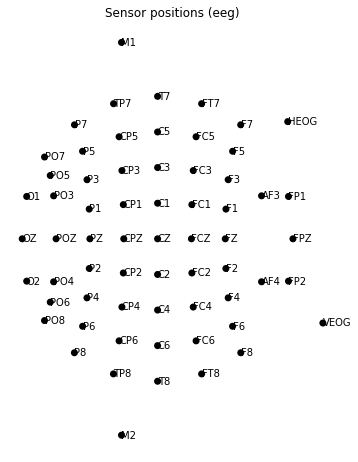

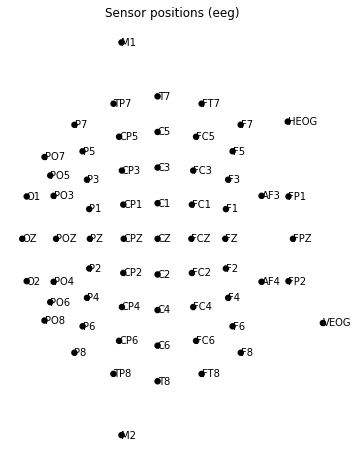

In [7]:
df = pd.read_csv('sub-001-eeg-sub-001_task-Rest_run-01_electrodes.tsv', delimiter ='\t').dropna()
# xyz = electrodes_xyz.to_numpy()
# chs = electrodes_xyz.to_dict('index')
# print(xyz)
# df = pd.read_csv('channels.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values
dig_ch_pos = dict(zip(ch_names,pos))
# print(dig_ch_pos['CB1'])
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [8]:
import json
#json.load('sub-001-eeg-sub-001_task-Rest_run-01_eeg.json') # or json.load -- only json.loads work bc the 's' represents its for a str file

with open('sub-001-eeg-sub-001_task-Rest_run-01_eeg.json', 'r') as file:
    data = json.load(file)
    
data

{'InstitutionName': 'University of Arizona',
 'InstitutionalDepartmentName': 'Psychology',
 'PowerLineFrequency': 60,
 'ManufacturersModelName': 'Neuroscan Synamps2',
 'EEGGround': 'AFz',
 'EEGReference': 'Between Cz & CPz',
 'EEGChannelCount': 64,
 'TaskName': 'Rest',
 'MiscChannelCount': 66,
 'RecordingType': 'continuous',
 'RecordingDuration': 501.468,
 'SamplingFrequency': 500,
 'SubjectArtefactDescription': '~~',
 'EOGChannelCount': 0,
 'ECGChannelCount': 0,
 'EMGChannelCount': 0,
 'SoftwareFilters': 'n/a'}

In [9]:
# .fdt and .set

#MNE Python
import mne
data2 = mne.io.read_raw('sub-001_task-Rest_run-01_eeg.set', preload= True)

Reading sub-001_task-Rest_run-01_eeg.fdt
Reading 0 ... 250733  =      0.000 ...   501.466 secs...


In [10]:
data2
len(data2)
print(data2.info)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>


Effective window size : 4.096 (s)


<ipython-input-11-1e2520005338>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data2.plot_psd(fmax=50)


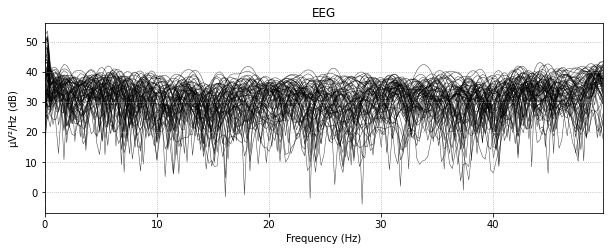

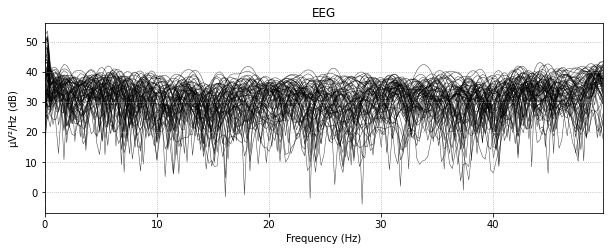

In [11]:
data2.plot_psd(fmax=50)

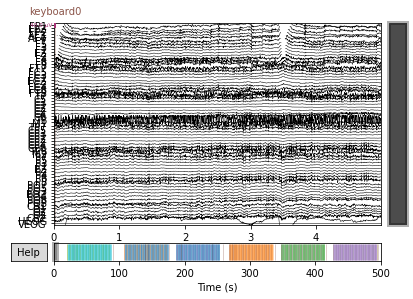

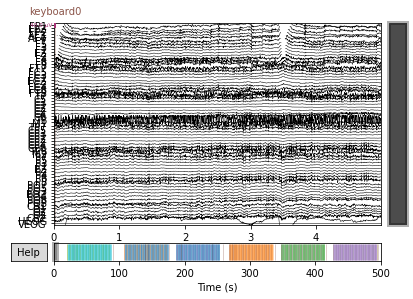

In [12]:
data2.plot(duration=5, n_channels=66, show_scrollbars=True)

Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.0s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

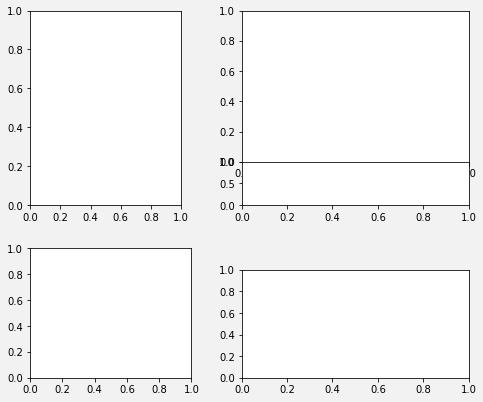

In [27]:
#data2.set_montage(montage)
from mne import io, Epochs
from mne.preprocessing import ICA

# ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
# ica.fit(data2)
# ica.exclude = [1,2]
# ica.plot_properties(data2, picks=ica.exclude) #need channel locations to plot topomap


# mne.find_events
# define event_id
# then epoch continuous data mne.epochs

Reading sub-001_task-Rest_run-01_eeg.fdt
Reading 0 ... 250733  =      0.000 ...   501.466 secs...
<Annotations | 937 segments: 1 (122), 11 (30), 12 (30), 13 (30), 14 (30), ...>
Effective window size : 4.096 (s)


<ipython-input-14-45643ab5593d>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeglab_raw.plot_psd(fmax=50)


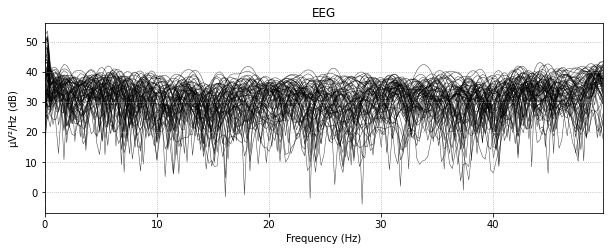

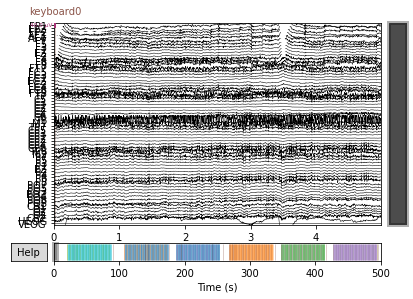

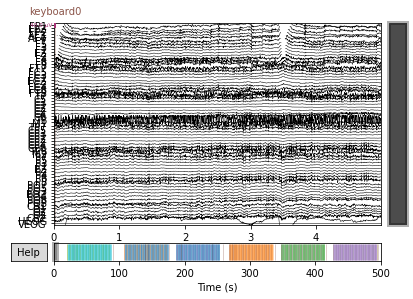

In [14]:
# testing_data_folder = mne.datasets.testing.data_path()
# eeglab_raw_file = os.path.join(testing_data_folder, 'EEGLAB', 'test_raw.set')
eeglab_raw = mne.io.read_raw_eeglab('sub-001_task-Rest_run-01_eeg.set', preload=True)
# eeglab_raw = eeglab_raw.drop_channels('CB2')
print(eeglab_raw.annotations)
# print('CB1' in eeglab_raw.ch_names) 
eeglab_raw.plot_psd(fmax=50)
eeglab_raw.plot(duration=5, n_channels=66, show_scrollbars=True)
# #both still work w the added read_raw_eeglab

In [15]:
#trying to get epochs

events_from_annot, event_dict = mne.events_from_annotations(eeglab_raw)
print(event_dict) #likely ea key is the electrode #
print(events_from_annot)
print(eeglab_raw.ch_names)


#event_id = dict(aud_l=1, aud_r=2) #event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
#eeglab_raw.set_channel_types({'HEOG': 'eog', 'VEOG': 'eog'})
picks = mne.pick_types(eeglab_raw.info, meg=False, eeg=True, eog=True, ecg=False, stim=False,
                       exclude='bads')


baseline = (None, 0)  # means from the first instant to t = 0
reject = dict(eog=150e-6)
#event_id=event_dict

epochs = mne.Epochs(eeglab_raw, events_from_annot, event_dict ,tmin, tmax, proj=True, picks=picks,
                   baseline=baseline, preload=True) #ignored the reject variable, was throwing an error
epochs.drop_channels('CB1')
epochs.drop_channels('CB2')
print('CB2' in epochs.ch_names)
print(epochs)
#find a way tp detect VEOG 
# eeglab_raw.pick_types(stim=True, misc=True,
#                eog=True, ecg=True, ref_meg=False).load_data() #-- this works


# print(eeglab_raw.__contains__('meg')) #--this works



# eeglab_raw.set_montage(montage)
# evoked = epochs[12].average()
# print(evoked)

Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
{'1': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '2': 9, '3': 10, '4': 11, '5': 12, '6': 13, 'keyboard0': 14}
[[     8      0     14]
 [ 10324      0      8]
 [ 10349      0      3]
 ...
 [247150      0     13]
 [247300      0      8]
 [247832      0     14]]
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG']
Not setting metadata
Not setting metadata
937 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection

Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.9s.


RuntimeError: Epochs don't match fitted data: 66 channels fitted but 64 channels supplied. 
Please provide Epochs compatible with ica.ch_names

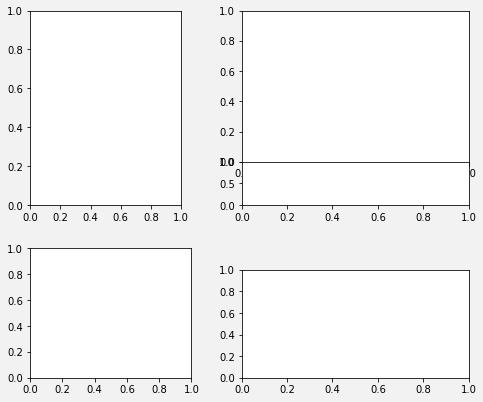

In [16]:
#ICA Analysis to create montage?
# from mne import io, Epochs
# from mne.preprocessing import ICA

# ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
# ica.fit(eeglab_raw)
# ica.exclude = [1,2]
# ica.plot_properties(epochs, picks=ica.exclude)

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'O1', 'OZ', 'O2', 'HEOG', 'VEOG']


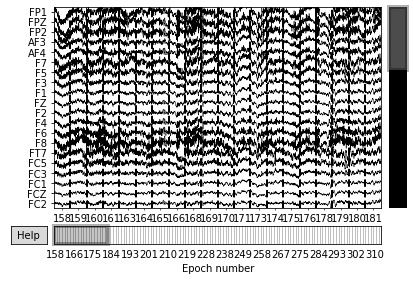

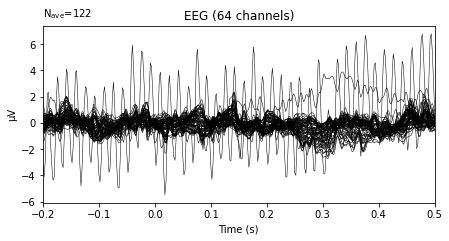

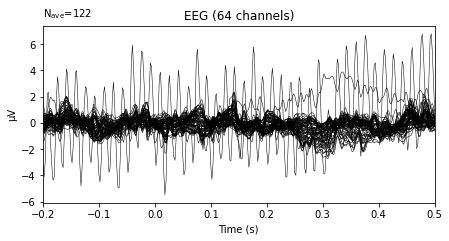

In [21]:
#Visualizing -- need to make an evks list first
from mne import read_evokeds
print(epochs.ch_names)
epochs['1'].plot() #this is event#14 that was marked 
evoked = epochs['1'].average() #this is averaging the signals to create an evoked plot  # epoch section 6 is v last; unsure of order of epochs
evoked.plot()

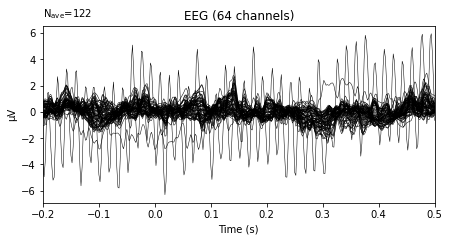

Applying baseline correction (mode: mean)


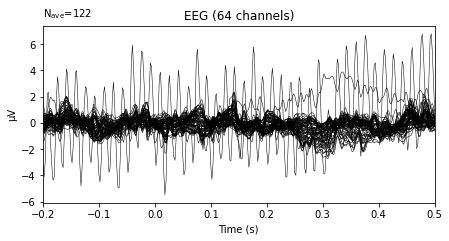

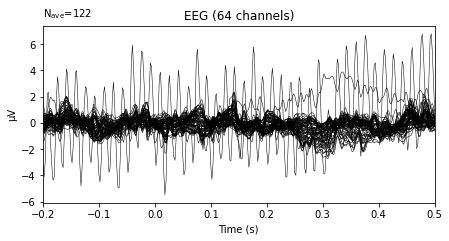

In [26]:
evoked.plot(picks='eeg')

# # Original baseline (none set).
# print(f'Baseline after loading: {evoked.baseline}')

# # Apply a custom baseline correction.
evoked.apply_baseline((None, 0))
# print(f'Baseline after calling apply_baseline(): {evoked.baseline}')

# Visualize the evoked response.
evoked.plot(picks='eeg')

In [19]:
#opening task files
with open('stimuli-Task Files-Rest COOCOC Enhanced.rtf', 'r') as file:
    text = file.read()
# print(text)

#\cf1 ! 238 (17) is for RSA\cf0\par
# ! 254 (1), 253 (2), 252 (3), 251 (4), 250 (5), 249 (6)  are for frontal asym.\par
# \cf2 ! 244 (11), 243 (12), 242 (13), 241 (14), 240 (15), 239 (16) are for LORETA: 2 second segments\par
# \cf0 ! Odd is closed, Even is open\par

<ipython-input-29-00f57faf7cff>:4: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  evoked.set_montage(montage)


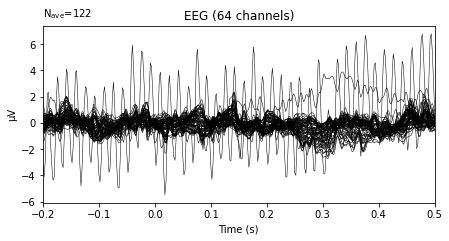

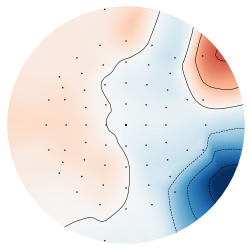

(<matplotlib.image.AxesImage at 0x7fa652a74940>,
 <matplotlib.contour.QuadContourSet at 0x7fa652a74550>)

In [29]:
# montage = mne.channels.read_montage(kind='sub-001_task-Rest_run-01_eeg.set', ch_names=None, path='datapath', unit='m', transform=False)
# print(montage)

evoked.set_montage(montage)
evoked.plot()
mne.viz.plot_topomap(evoked.data[:, 0], evoked.info)

In [ ]:
#be able to scroll through epochs -- put in a variable to get multiple